**Background:**
The tourism sector makes a significant impact on Sydney’s economy, benefiting the city’s businesses and communities.
Sydney offers a wide variety of touristic attractions - museums, night clubs, theatre and ballet, sightseeing, and beaches. This attract differect categories of tourists - from backpackers to luxury family trips. Apart from purely touristic purposes many people come to Sydney for business or transit travel. 

Over 12.4 million visitors travelled to Sydney in the year ending June 2020. 
This total was made up of 2.8 million international visitors and 9.6 million domestic visitors.
Although the numbers were down 22% when compared to the 15.9 million visitors in 2019, they are expected to get back to higher levels over the next 5 years.

For 2019/20, there were 19,756,379 international visitors nights in the City of Sydney, accounting for 50.3% of the total visitor nights, while domestic visitor nights in the same period made 14,068,970.

Sources:
1. City of Sydney. Tourism visitor summary https://economy.id.com.au/sydney/tourism-visitor-summary
2. INTERNATIONAL VISITOR SURVEY RESULTS SEPTEMBER 2020. https://www.tra.gov.au/data-and-research/reports/international-visitor-survey-results-september-2020/international-visitor-survey-results-september-2020
3. Sydney Tourism Statistics. https://camperchamp.com.au/statistics/australia/sydney-tourism/#:~:text=How%20many%20tourists%20visited%20Sydney,July%202018%20to%20June%202019.&text=This%20total%20included%204.1%20million,12%20million%20domestic%20overnight%20visitors.

**Problem identified and project goal:**
As Sydney is one of busiest travel destination in Australia, as well is one of the largest cities in the world, it hosts a wide range of accomodation options, from camping to boutique hotels.
Airbnb also offers a lot of places to stay and its database is constantly growing. 
But given the size of the city and a variety of options it can be difficult to choose where to stay given one's travel goals.

This project aims to find an optimal suburb in Sydney for tourists to rent on Airnbn during their travel. 
The major criteria are: proximity to tourist attractions, crime rates in the suburb and pricing. 

**Target Audience:**
International and domestic travellers visiting Sydney for a short term for tourist and business purposes. 
The results should be useful for those not familiar with Sydney suburbs or those who want to try some new part of the city.

**Data and Data sources:**

this research will be using free abd publicly available datasets.

*Airbnb data:*
extracted from Inside Airbnb. http://insideairbnb.com/get-the-data.html
Data includes dated listings on Airbnb as of Dec 2020 and review details.
This will be used to identify price ranges for different suburbs, quality of accomodation based on users' reviews and location of each accomodation.

*Crime statistics data:*
extracted from NSW Bureau of Crime Statistics and Research. https://www.bocsar.nsw.gov.au/Pages/bocsar_datasets/Offence.aspx
Data includes numbers of crimes in 1995 to September 2020 by type in each suburb.
This will be used to identify suburbs with high crime rates which is a disadvantage for a tourist accomodation.

*Attractions data:*
extracted from Foursquare API. 
Data includes listing of different types of venues and attractions by suburb.
This will be used to assess proximity of Airbnb locations to tourist attractions and, potentially, will help identify other benefits of each suburb (beaches, cafes, night clubs etc.)

**Data uploads and cleansing**

In [1]:
#Download libraries needed for this work:
import pandas as pd # import library to read data into dataframe
pd.set_option('display.max_columns', None)
import numpy as np # import numpy library
import re # import library for regular expression
print ("Libraries imported!")

Libraries imported!


In [2]:
#scrape the following page, https://www.intosydneydirectory.com.au/sydney-postcodes.php, in order to obtain the data that is in the table of postal codes

#use Beautiful Soup to scrape data from url. see detailed articles below:
#https://towardsdatascience.com/step-by-step-tutorial-web-scraping-wikipedia-with-beautifulsoup-48d7f2dfa52d
#https://levelup.gitconnected.com/two-simple-ways-to-scrape-text-from-wikipedia-in-python-9ce07426579b
#https://www.freecodecamp.org/news/scraping-wikipedia-articles-with-python/
#https://stackoverflow.com/questions/54890708/scraping-data-from-wikipedia-table

#import libraries for scraping
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
from urllib.request import urlopen
print('Libraries imported.')

Libraries imported.


In [3]:
#simple data upload - not the preferred way
#url='https://www.intosydneydirectory.com.au/sydney-postcodes.php'
#df=pd.read_html(url, header=0)[0]
#df.head()

In [4]:
#as intosydneydirectory.com.au sometimes returns a runtime error, I've created a list of Syndey postcodes manually
# list of Syndey suburbs 
suburbs = ['Sydney','Waverley','Woollahra','Randwick','Leichhardt','Willoughby','Hornsby','Mosman','Manly','Ryde','Dundas','Ashfield','Burwood','Strathfield','Holroyd','Auburn','Blacktown','Prospect','Parramatta','Fairfield','Hinchinbrook','Liverpool','Canterbury','Bankstown','Marrickville','Rockdale','Kogarah','Hurstville','Campbelltown','Camden','Penrith','Richmond'
]
# list of postcodes
postcodes = ['2000','2024','2025','2031','2040','2068','2077','2088','2095','2112','2117','2131','2134','2135','2142','2144','2148','2148','2150','2165','2168','2170','2193','2200','2204','2216','2217','2220','2560','2570','2750','2753'
] 
  
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df_postcodes = pd.DataFrame(list(zip(suburbs, postcodes)), 
               columns =['Suburb', 'Postcode']) 
df_postcodes = df_postcodes.sort_values('Suburb',ascending=True)

#the pd.merge did not work to merge Airbnb table and Postcodes atble on Suburb
#to ensure the dtype for Suburb is the same - applied 'str' type manually to the column
#convert Suburb to string (text)
df_postcodes['Suburb'].apply(str)

#the merge still did not work on these tables, need to make a profound check of the dtype for the Suburb column
#it appears that the Suburb has some unpritnable symbols which prevented merge
#df_postcodes.Suburb = df_postcodes.Suburb.str.encode('utf-8')

df_postcodes

,Suburb,Postcode
11,Ashfield,2131
15,Auburn,2144
23,Bankstown,2200
16,Blacktown,2148
12,Burwood,2134
29,Camden,2570
28,Campbelltown,2560
22,Canterbury,2193
10,Dundas,2117
19,Fairfield,2165


In [5]:
df_postcodes.dtypes

Suburb      object
Postcode    object
dtype: object

In [6]:
#Download the data from insideairbnb.com and read it into a pandas dataframe
filepath = "http://data.insideairbnb.com/australia/2021-01-22/visualisations/listings.csv"
df_listings = pd.read_csv(filepath)

print("Data read into dataframe!")
df_listings.shape

Data read into dataframe!


(153914, 17)

In [7]:
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,29786588,Bestview Cottage,224083235,Carmela,New South Wales,Orange,-33.33346,149.03763,Entire home/apt,190,1,81,21,2021-01-29,3.00,1,167
1,45318800,"Lakeside House- 23 Acres, 10 minutes from Orange!",366315077,Harry & Danielle,New South Wales,Orange,-33.33337,149.04834,Entire home/apt,1000,2,14,14,2021-01-21,3.62,1,29
2,22151808,Bright and Cosy Room in Orange.,78371092,Diana,New South Wales,Orange,-33.28470,149.10878,Private room,68,2,5,0,2018-10-06,0.14,4,274
3,22518202,HG 105A Sale St. STYLISH IN THE HEART OF ORANGE,89994665,"Marianne, Terry & Richard",New South Wales,Orange,-33.27709,149.09787,Entire home/apt,166,1,158,59,2021-01-25,4.48,2,320
4,21871881,"""BLUE & WHITE NILE"" Work, Rest or Play. Walk CBD",78345518,Kristin,New South Wales,Orange,-33.28375,149.11322,Entire home/apt,290,2,86,23,2021-01-26,2.26,1,92


In [8]:
#clean the Airbnb table:
#remove unnessesary columns:
df_airbnb = df_listings.drop(['name', 'host_id', 'host_name', 'room_type'], axis = 1)
df_airbnb.drop(df_airbnb.iloc[:, 6:13], inplace = True, axis = 1)
#rename header
df_airbnb.rename(columns = {'neighbourhood': 'Suburb', 'neighbourhood_group': 'State'}, inplace=True)

#the pd.merge did not work to merge Airbnb table and Postcodes atble on Suburb
#to ensure the dtype for Suburb is the same - applied 'str' type manually to the colimn
df_airbnb['Suburb'].apply(str)

#the merge still did not work on these tables, need to make a profound check of the dtype for the Suburb column
#it appears that the Suburb has some unpritnable symbols which prevented merge
#df_airbnb.Suburb = df_airbnb.Suburb.str.encode('utf-8')

#now I can see that there's a space at the end of each line
#removing all spaces in column Suburn using the strip
df_airbnb.Suburb = df_airbnb.Suburb.str.strip()

df_airbnb.head()

,id,State,Suburb,latitude,longitude,price
0,29786588,New South Wales,Orange,-33.33346,149.03763,190
1,45318800,New South Wales,Orange,-33.33337,149.04834,1000
2,22151808,New South Wales,Orange,-33.28470,149.10878,68
3,22518202,New South Wales,Orange,-33.27709,149.09787,166
4,21871881,New South Wales,Orange,-33.28375,149.11322,290


In [9]:
df_airbnb.shape

(153914, 6)

In [10]:
# Manually check if one of the Suburbs in df_postcodes is present in df_Airbnb to get the pd.merge working
#df_airbnb[df_airbnb['Suburb'].str.contains('Auburn')]
#returns error: Cannot use .str.contains with values of inferred dtype 'bytes'.

#filter by Auburn
df_airbnb[df_airbnb.Suburb == 'Auburn']

,id,State,Suburb,latitude,longitude,price
4120,22342690,New South Wales,Auburn,-33.82576,151.08034,65
4121,47130072,New South Wales,Auburn,-33.84802,151.07543,230
4123,29725519,New South Wales,Auburn,-33.82578,151.07793,50
4124,44868741,New South Wales,Auburn,-33.83176,151.07359,45
4125,42691158,New South Wales,Auburn,-33.84691,151.06762,129
...,...,...,...,...,...,...
135905,20972032,New South Wales,Auburn,-33.83673,151.05953,100
135906,41695007,New South Wales,Auburn,-33.84744,151.07263,160
135917,27692115,New South Wales,Auburn,-33.86112,151.02796,80
135918,29844760,New South Wales,Auburn,-33.82542,151.07924,109


In [11]:
#check how many listings in each state
airbnb_groupped = df_airbnb.groupby('State').count()
airbnb_groupped

,id,Suburb,latitude,longitude,price
State,,,,,
Australian Capital Territory,1147,1147,1147,1147,1147
New South Wales,63530,63530,63530,63530,63530
Northern Territory,755,755,755,755,755
Other Territories,22,22,22,22,22
Queensland,25815,25815,25815,25815,25815
South Australia,7009,7009,7009,7009,7009
Tasmania,4921,4921,4921,4921,4921
Victoria,38770,38770,38770,38770,38770
Western Australia,11945,11945,11945,11945,11945


In [12]:
#as we analyse only Sydney, we can remove all other states from the table
# Get names of indexes for which column State does not equal New South Wales
states = df_airbnb[df_airbnb['State'] !='New South Wales' ].index
# Delete these row indexes from dataFrame and create a new df
df_NSW_Airbnb = df_airbnb.drop(states)
#sort by suburb
df_NSW_Airbnb = df_NSW_Airbnb.sort_values('Suburb',ascending=True)
df_NSW_Airbnb.head()

,id,State,Suburb,latitude,longitude,price
132666,23889434,New South Wales,Albury,-36.06210,147.05362,142
78504,4123050,New South Wales,Albury,-36.07958,146.90932,93
78503,33050887,New South Wales,Albury,-36.08723,146.91050,229
61409,44909653,New South Wales,Albury,-36.07307,146.92556,150
61410,33528967,New South Wales,Albury,-36.07309,146.91110,197


In [13]:
#check if all NSW listings remained in df
df_NSW_Airbnb.shape

(63530, 6)

In [14]:
df_NSW_Airbnb.dtypes

id             int64
State         object
Suburb        object
latitude     float64
longitude    float64
price          int64
dtype: object

In [15]:
#check how many listings in each suburb
airbnbNSW_groupped = df_NSW_Airbnb.groupby('Suburb').count()
airbnbNSW_groupped

,id,State,latitude,longitude,price
Suburb,,,,,
Albury,196,196,196,196,196
Armidale Dumaresq,121,121,121,121,121
Ashfield,256,256,256,256,256
Auburn,377,377,377,377,377
Ballina,661,661,661,661,661
...,...,...,...,...,...
Wollongong,585,585,585,585,585
Woollahra,1422,1422,1422,1422,1422
Wyong,712,712,712,712,712


In [16]:
#add postcode to df_NSW_Airbnb by looking up Suburb from df_postcodes
#refer to https://www.geeksforgeeks.org/how-to-do-a-vlookup-in-python-using-pandas/
#merge
df_SYD_Airbnb = pd.merge(df_NSW_Airbnb, df_postcodes, left_on='Suburb', right_on='Suburb', how = 'inner')
df_SYD_Airbnb

,id,State,Suburb,latitude,longitude,price,Postcode
0,41984137,New South Wales,Ashfield,-33.88950,151.12522,99,2131
1,38735292,New South Wales,Ashfield,-33.89381,151.13730,50,2131
2,38909742,New South Wales,Ashfield,-33.88929,151.13389,75,2131
3,18147244,New South Wales,Ashfield,-33.88065,151.13027,50,2131
4,39876996,New South Wales,Ashfield,-33.88656,151.12479,90,2131
...,...,...,...,...,...,...,...
27363,43217991,New South Wales,Woollahra,-33.87566,151.23169,45,2025
27364,7407049,New South Wales,Woollahra,-33.87614,151.24808,132,2025
27365,7406644,New South Wales,Woollahra,-33.87568,151.24775,250,2025
27366,23811498,New South Wales,Woollahra,-33.87820,151.24327,110,2025


In [17]:
#drop all NaN postcodes as they do not belong to Sydney = obsolete rows
df_SYD = df_SYD_Airbnb[df_SYD_Airbnb['Postcode'].notna()]
df_SYD
#do not need this as inner merge will drop all suburbs where there's no match in df_postcodes

,id,State,Suburb,latitude,longitude,price,Postcode
0,41984137,New South Wales,Ashfield,-33.88950,151.12522,99,2131
1,38735292,New South Wales,Ashfield,-33.89381,151.13730,50,2131
2,38909742,New South Wales,Ashfield,-33.88929,151.13389,75,2131
3,18147244,New South Wales,Ashfield,-33.88065,151.13027,50,2131
4,39876996,New South Wales,Ashfield,-33.88656,151.12479,90,2131
...,...,...,...,...,...,...,...
27363,43217991,New South Wales,Woollahra,-33.87566,151.23169,45,2025
27364,7407049,New South Wales,Woollahra,-33.87614,151.24808,132,2025
27365,7406644,New South Wales,Woollahra,-33.87568,151.24775,250,2025
27366,23811498,New South Wales,Woollahra,-33.87820,151.24327,110,2025


In [18]:
#get the coordinates for each suburb in the df_postcodes - this is required to have a list of all suburbs with coordinates
df_SYD_suburbs = pd.merge(df_postcodes, df_SYD_Airbnb [['Suburb','latitude', 'longitude']], on='Suburb', how = 'left')
#dropping all duplicate lines to leave only one row with coordinates for each suburb
df_suburbs_coordinates = df_SYD_suburbs.drop_duplicates(['Suburb'])

#the other way to get the same result is by grouping but 'groups' could not be used later to get the nearby venues
#first() means only the first occuring value is picked up, can be replaced by min(), max() etc. as need might be
# df_suburbs_coordinates = df_SYD_suburbs.groupby(['Suburb'])[['Postcode','latitude', 'longitude']].first().reset_index()

df_suburbs_coordinates = df_suburbs_coordinates[df_suburbs_coordinates['latitude'].notna()]
print(df_suburbs_coordinates.shape)
print(df_suburbs_coordinates.dtypes)
df_suburbs_coordinates

(28, 4)
Suburb        object
Postcode      object
latitude     float64
longitude    float64
dtype: object


,Suburb,Postcode,latitude,longitude
0,Ashfield,2131,-33.88950,151.12522
256,Auburn,2144,-33.84787,151.07174
633,Bankstown,2200,-33.90007,151.05950
888,Blacktown,2148,-33.69214,150.88678
1166,Burwood,2134,-33.88060,151.10835
1390,Camden,2570,-34.00516,150.73021
1443,Campbelltown,2560,-34.07567,150.79171
1546,Canterbury,2193,-33.92975,151.10013
1881,Fairfield,2165,-33.88481,150.93137
1968,Holroyd,2142,-33.84959,150.98385


 **Explore and cluster the Suburbs in Sydney**

**Analyze by Foursquare data - venues number and categories**

In [19]:
import requests # library to handle requests
import random # library for random number generation

! pip install folium==0.5.0
import folium # map plotting library

print('Folium installed')

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

     |████████████████████████████████| 79 kB 8.0 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=73234a3a4d9a3805106733b8f442a648114abe9e8dc47e8f5e7380b78728ffbc
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium installed
Libraries imported.


In [20]:
#address = 'Sydney, 2000, NSW Australia'

latitude = -33.865143
longitude = 151.209900
print('The geograpical coordinates of Sydney are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Sydney are -33.865143, 151.2099.


In [21]:
# create map of Sydney using latitude and longitude values
map_Sydney = folium.Map(location=[latitude, longitude], zoom_start=12)
map_Sydney

In [22]:
#Explore and cluster Suburbs in Sydney 
#add markers to map
for lat, lng, label in zip(df_suburbs_coordinates['latitude'], df_suburbs_coordinates['longitude'], df_suburbs_coordinates['Suburb']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Sydney)  
    
map_Sydney
#Make this Notebook Trusted to load map: File -> Trust Notebook

In [23]:
#utilize the Foursquare API to explore the boroughs and segment them.
#Define Foursquare Credentials and Version
CLIENT_ID = 'G1H3RJITBJXNCORFTRHECPTP1MSQRWDL1C5X1IZGTVWSL35T' # your Foursquare ID
CLIENT_SECRET = 'YDZKGPEJM3AKIEEPKCCC3GEXSZIARBXDTTVWV0CADQ0XUA3S' # your Foursquare Secret
VERSION = '20210130' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: G1H3RJITBJXNCORFTRHECPTP1MSQRWDL1C5X1IZGTVWSL35T
CLIENT_SECRET:YDZKGPEJM3AKIEEPKCCC3GEXSZIARBXDTTVWV0CADQ0XUA3S


In [24]:
#Explore Suburbs in Sydney using Foursquare API
# define function to get the top 100 venues in each suburn within a radius of 500 meters - repeat the same process to all suburbs in Sydney
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
 
    return(nearby_venues)

In [25]:
#create a new dataframe showing the results of the above function
Sydney_venues = getNearbyVenues(names=df_suburbs_coordinates['Suburb'],
                                   latitudes=df_suburbs_coordinates['latitude'],
                                   longitudes=df_suburbs_coordinates['longitude']
                                  )

#error can be due to exceeding the limit of calls, as the first table used included over 20k coordinates. Once reduced to 28 by removing the duplicate Suburds should work the next day

Ashfield
Auburn
Bankstown
Blacktown
Burwood
Camden
Campbelltown
Canterbury
Fairfield
Holroyd
Hornsby
Hurstville
Kogarah
Leichhardt
Liverpool
Manly
Marrickville
Mosman
Parramatta
Penrith
Randwick
Rockdale
Ryde
Strathfield
Sydney
Waverley
Willoughby
Woollahra


In [26]:
print(Sydney_venues.shape)
Sydney_venues.head()

(518, 7)


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ashfield,-33.8895,151.12522,Manmaruya,-33.889603,151.126183,Japanese Restaurant
1,Ashfield,-33.8895,151.12522,Choo Choo Train,-33.888275,151.124196,Chinese Restaurant
2,Ashfield,-33.8895,151.12522,New Shanghai Night 新夜上海,-33.888461,151.124393,Shanghai Restaurant
3,Ashfield,-33.8895,151.12522,New Shanghai 新上海,-33.888160,151.124500,Shanghai Restaurant
4,Ashfield,-33.8895,151.12522,Taste of Shanghai,-33.888279,151.123992,Dumpling Restaurant


In [27]:
#check how many venues were returned for each suburb
print(Sydney_venues.groupby('Suburb').count().shape)
Sydney_venues.groupby('Suburb').count()

(25, 6)


,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Ashfield,36,36,36,36,36,36
Auburn,28,28,28,28,28,28
Bankstown,2,2,2,2,2,2
Burwood,9,9,9,9,9,9
Campbelltown,5,5,5,5,5,5
Canterbury,2,2,2,2,2,2
Fairfield,15,15,15,15,15,15
Holroyd,5,5,5,5,5,5
Hornsby,1,1,1,1,1,1


In [28]:
#sort by number of venues in each suburb
Sydney_venues_sort = Sydney_venues.groupby('Suburb').count().sort_values('Venue', ascending=False)
Sydney_venues_sort.head()

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
Sydney,93,93,93,93,93,93
Waverley,58,58,58,58,58,58
Willoughby,47,47,47,47,47,47
Strathfield,44,44,44,44,44,44
Marrickville,43,43,43,43,43,43


In [29]:
#rearrange columns (https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns)
#reassign the dataframe with a list of the columns
cols1 = Sydney_venues_sort.columns.tolist()
#current columns order
cols1
#Rearrange cols they way you want
cols2 = ['Venue',
         'Venue Category',
         'Suburb Latitude',
         'Suburb Longitude',
         'Venue Latitude',
         'Venue Longitude'
 ]
#new columns order
cols2
#reorder the dataframe like this and drop some columns (where 1 is the axis number (0 for rows and 1 for columns.)):
Sydney_venues_sorted = Sydney_venues_sort[cols2]

print(Sydney_venues_sorted.shape)
Sydney_venues_sorted

(25, 6)


,Venue,Venue Category,Suburb Latitude,Suburb Longitude,Venue Latitude,Venue Longitude
Suburb,,,,,,
Sydney,93,93,93,93,93,93
Waverley,58,58,58,58,58,58
Willoughby,47,47,47,47,47,47
Strathfield,44,44,44,44,44,44
Marrickville,43,43,43,43,43,43
Leichhardt,39,39,39,39,39,39
Ashfield,36,36,36,36,36,36
Rockdale,28,28,28,28,28,28
Auburn,28,28,28,28,28,28


In [30]:
#check how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(Sydney_venues['Venue Category'].unique())))

There are 138 uniques categories.


**Cluster by Airbnb data - average price per night**

In [31]:
#get the Airbnb listing table to anayse pricing by suburb
print(df_SYD.dtypes)
df_SYD.head()

id             int64
State         object
Suburb        object
latitude     float64
longitude    float64
price          int64
Postcode      object
dtype: object


,id,State,Suburb,latitude,longitude,price,Postcode
0,41984137,New South Wales,Ashfield,-33.88950,151.12522,99,2131
1,38735292,New South Wales,Ashfield,-33.89381,151.13730,50,2131
2,38909742,New South Wales,Ashfield,-33.88929,151.13389,75,2131
3,18147244,New South Wales,Ashfield,-33.88065,151.13027,50,2131
4,39876996,New South Wales,Ashfield,-33.88656,151.12479,90,2131


In [32]:
#Group Suburbs by price
SYD_Airbnb2 = df_SYD.groupby(['Suburb'], as_index=False).mean()
SYD_Airbnb = SYD_Airbnb2.drop(SYD_Airbnb2.columns[[1, 2, 3]], axis=1)
print(SYD_Airbnb.dtypes)
SYD_Airbnb

Suburb     object
price     float64
dtype: object


,Suburb,price
0,Ashfield,145.320312
1,Auburn,158.148541
2,Bankstown,109.549020
3,Blacktown,94.730216
4,Burwood,94.678571
5,Camden,123.943396
6,Campbelltown,253.854369
7,Canterbury,98.829341
8,Fairfield,103.058140
9,Holroyd,262.406250


Text(0.5, 1.0, 'SYD price bins')

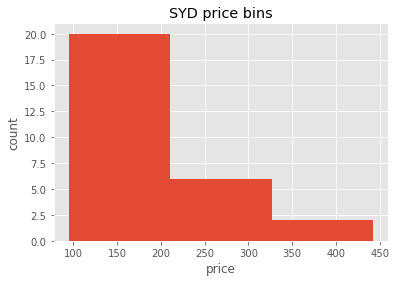

In [33]:
#bin the Suburbs by prices into 3 bins
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.style.use('ggplot')
plt.pyplot.hist(SYD_Airbnb['price'], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("SYD price bins")

In [107]:
#set price group names
price_groups = ['low', 'medium', 'high']
#apply the function "cut" the determine what each value of 'price' belongs to
SYD_Airbnb['price category'] = pd.cut(SYD_Airbnb['price'], 3, labels=price_groups, include_lowest=True )
SYD_Airbnb[['Suburb', 'price','price category']]

,Suburb,price,price category
0,Ashfield,145.320312,low
1,Auburn,158.148541,low
2,Bankstown,109.549020,low
3,Blacktown,94.730216,low
4,Burwood,94.678571,low
5,Camden,123.943396,low
6,Campbelltown,253.854369,medium
7,Canterbury,98.829341,low
8,Fairfield,103.058140,low
9,Holroyd,262.406250,medium


In [110]:
#merge the 2 tables to get price rates for the suburbs in Airbnb listings
SYD_Airbnb_prices = pd.merge(df_suburbs_coordinates[['Suburb', 'latitude','longitude']], SYD_Airbnb [['Suburb', 'price']], left_on='Suburb', right_on='Suburb', how = 'left')
SYD_Airbnb_prices

,Suburb,latitude,longitude,price
0,Ashfield,-33.88950,151.12522,145.320312
1,Auburn,-33.84787,151.07174,158.148541
2,Bankstown,-33.90007,151.05950,109.549020
3,Blacktown,-33.69214,150.88678,94.730216
4,Burwood,-33.88060,151.10835,94.678571
5,Camden,-34.00516,150.73021,123.943396
6,Campbelltown,-34.07567,150.79171,253.854369
7,Canterbury,-33.92975,151.10013,98.829341
8,Fairfield,-33.88481,150.93137,103.058140
9,Holroyd,-33.84959,150.98385,262.406250


In [35]:
#see the number of suburbs in each bin
SYD_Airbnb["price category"].value_counts()

low       20
medium     6
high       2
Name: price category, dtype: int64

Text(0.5, 1.0, 'price categories')

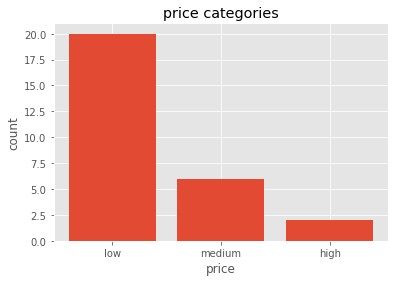

In [36]:
#plot the distribution of each bin.
pyplot.bar(price_groups, SYD_Airbnb['price category'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price categories")

In [37]:
# one hot encoding - dataframe to show room price in each Suburb
SYD_Airbnb_by_cat = pd.get_dummies(SYD_Airbnb[['price category']], prefix="", prefix_sep="")

# add Suburb column back to dataframe
SYD_Airbnb_by_cat['Suburb'] = SYD_Airbnb['Suburb'] 

print(SYD_Airbnb_by_cat.dtypes)
SYD_Airbnb_by_cat

low        uint8
medium     uint8
high       uint8
Suburb    object
dtype: object


,low,medium,high,Suburb
0,1,0,0,Ashfield
1,1,0,0,Auburn
2,1,0,0,Bankstown
3,1,0,0,Blacktown
4,1,0,0,Burwood
5,1,0,0,Camden
6,0,1,0,Campbelltown
7,1,0,0,Canterbury
8,1,0,0,Fairfield
9,0,1,0,Holroyd


**Cluster by crime data - average monthly rates**

In [38]:
#Download the data from NSW Bureau of Crime Statistics and Research and read it into a pandas dataframe
filepath2 = "https://www.bocsar.nsw.gov.au/Documents/Datasets/PostcodeData.zip"
df_crimes = pd.read_csv(filepath2)

print("Data read into dataframe!")
df_crimes.shape

Data read into dataframe!


(39122, 315)

In [39]:
df_crimes.head()

,Postcode,Offence category,Subcategory,Jan 1995,Feb 1995,Mar 1995,Apr 1995,May 1995,Jun 1995,Jul 1995,Aug 1995,Sep 1995,Oct 1995,Nov 1995,Dec 1995,Jan 1996,Feb 1996,Mar 1996,Apr 1996,May 1996,Jun 1996,Jul 1996,Aug 1996,Sep 1996,Oct 1996,Nov 1996,Dec 1996,Jan 1997,Feb 1997,Mar 1997,Apr 1997,May 1997,Jun 1997,Jul 1997,Aug 1997,Sep 1997,Oct 1997,Nov 1997,Dec 1997,Jan 1998,Feb 1998,Mar 1998,Apr 1998,May 1998,Jun 1998,Jul 1998,Aug 1998,Sep 1998,Oct 1998,Nov 1998,Dec 1998,Jan 1999,Feb 1999,Mar 1999,Apr 1999,May 1999,Jun 1999,Jul 1999,Aug 1999,Sep 1999,Oct 1999,Nov 1999,Dec 1999,Jan 2000,Feb 2000,Mar 2000,Apr 2000,May 2000,Jun 2000,Jul 2000,Aug 2000,Sep 2000,Oct 2000,Nov 2000,Dec 2000,Jan 2001,Feb 2001,Mar 2001,Apr 2001,May 2001,Jun 2001,Jul 2001,Aug 2001,Sep 2001,Oct 2001,Nov 2001,Dec 2001,Jan 2002,Feb 2002,Mar 2002,Apr 2002,May 2002,Jun 2002,Jul 2002,Aug 2002,Sep 2002,Oct 2002,Nov 2002,Dec 2002,Jan 2003,Feb 2003,Mar 2003,Apr 2003,May 2003,Jun 2003,Jul 2003,Aug 2003,Sep 2003,Oct 2003,Nov 2003,Dec 2003,Jan 2004,Feb 2004,Mar 2004,Apr 2004,May 2004,Jun 2004,Jul 2004,Aug 2004,Sep 2004,Oct 2004,Nov 2004,Dec 2004,Jan 2005,Feb 2005,Mar 2005,Apr 2005,May 2005,Jun 2005,Jul 2005,Aug 2005,Sep 2005,Oct 2005,Nov 2005,Dec 2005,Jan 2006,Feb 2006,Mar 2006,Apr 2006,May 2006,Jun 2006,Jul 2006,Aug 2006,Sep 2006,Oct 2006,Nov 2006,Dec 2006,Jan 2007,Feb 2007,Mar 2007,Apr 2007,May 2007,Jun 2007,Jul 2007,Aug 2007,Sep 2007,Oct 2007,Nov 2007,Dec 2007,Jan 2008,Feb 2008,Mar 2008,Apr 2008,May 2008,Jun 2008,Jul 2008,Aug 2008,Sep 2008,Oct 2008,Nov 2008,Dec 2008,Jan 2009,Feb 2009,Mar 2009,Apr 2009,May 2009,Jun 2009,Jul 2009,Aug 2009,Sep 2009,Oct 2009,Nov 2009,Dec 2009,Jan 2010,Feb 2010,Mar 2010,Apr 2010,May 2010,Jun 2010,Jul 2010,Aug 2010,Sep 2010,Oct 2010,Nov 2010,Dec 2010,Jan 2011,Feb 2011,Mar 2011,Apr 2011,May 2011,Jun 2011,Jul 2011,Aug 2011,Sep 2011,Oct 2011,Nov 2011,Dec 2011,Jan 2012,Feb 2012,Mar 2012,Apr 2012,May 2012,Jun 2012,Jul 2012,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012,Jan 2013,Feb 2013,Mar 2013,Apr 2013,May 2013,Jun 2013,Jul 2013,Aug 2013,Sep 2013,Oct 2013,Nov 2013,Dec 2013,Jan 2014,Feb 2014,Mar 2014,Apr 2014,May 2014,Jun 2014,Jul 2014,Aug 2014,Sep 2014,Oct 2014,Nov 2014,Dec 2014,Jan 2015,Feb 2015,Mar 2015,Apr 2015,May 2015,Jun 2015,Jul 2015,Aug 2015,Sep 2015,Oct 2015,Nov 2015,Dec 2015,Jan 2016,Feb 2016,Mar 2016,Apr 2016,May 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Oct 2016,Nov 2016,Dec 2016,Jan 2017,Feb 2017,Mar 2017,Apr 2017,May 2017,Jun 2017,Jul 2017,Aug 2017,Sep 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018,Nov 2018,Dec 2018,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,Oct 2020,Nov 2020,Dec 2020
0,2000,Homicide,Murder *,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000,Homicide,Attempted murder,0,0,0,2,0,0,0,0,0,0,0,2,0,1,0,0,1,1,0,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2,1,1,1,1,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0

In [40]:
#drop all years before 2019: @https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/
# Remove all columns between column name 'Subcategory' to 'Dec 2018'
crime_rates = df_crimes.drop(df_crimes.loc[:, 'Jan 1995':'Dec 2018'].columns, axis = 1)

#convert Postcode to string (text)
crime_rates['Postcode'] = crime_rates['Postcode'].apply(str)
#crime_rates.Postcode = crime_rates.Postcode.str.encode('utf-8')

print(crime_rates.dtypes)
crime_rates.head()

Postcode            object
Offence category    object
Subcategory         object
Jan 2019             int64
Feb 2019             int64
Mar 2019             int64
Apr 2019             int64
May 2019             int64
Jun 2019             int64
Jul 2019             int64
Aug 2019             int64
Sep 2019             int64
Oct 2019             int64
Nov 2019             int64
Dec 2019             int64
Jan 2020             int64
Feb 2020             int64
Mar 2020             int64
Apr 2020             int64
May 2020             int64
Jun 2020             int64
Jul 2020             int64
Aug 2020             int64
Sep 2020             int64
Oct 2020             int64
Nov 2020             int64
Dec 2020             int64
dtype: object


,Postcode,Offence category,Subcategory,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,Oct 2020,Nov 2020,Dec 2020
0,2000,Homicide,Murder *,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000,Homicide,Attempted murder,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2000,Homicide,"Murder accessory, conspiracy",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2000,Homicide,Manslaughter *,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2000,Assault,Domestic violence related assault,17,27,20,16,11,23,16,27,21,22,16,18,25,18,17,16,19,20,16,15,29,26,23,26


In [41]:
#add column showing avg mthly crime rates for 2019-2020 for each suburb
crime_avg = crime_rates.groupby(['Postcode'], as_index=False).mean()

crime_avg['Postcode'].apply(str)
print(crime_avg.dtypes)
#add avg column for each postcode 
crime_avg['avg crime rate'] = crime_avg.mean(numeric_only=True, axis=1)
crime_avg.head()

Postcode     object
Jan 2019    float64
Feb 2019    float64
Mar 2019    float64
Apr 2019    float64
May 2019    float64
Jun 2019    float64
Jul 2019    float64
Aug 2019    float64
Sep 2019    float64
Oct 2019    float64
Nov 2019    float64
Dec 2019    float64
Jan 2020    float64
Feb 2020    float64
Mar 2020    float64
Apr 2020    float64
May 2020    float64
Jun 2020    float64
Jul 2020    float64
Aug 2020    float64
Sep 2020    float64
Oct 2020    float64
Nov 2020    float64
Dec 2020    float64
dtype: object


,Postcode,Jan 2019,Feb 2019,Mar 2019,Apr 2019,May 2019,Jun 2019,Jul 2019,Aug 2019,Sep 2019,Oct 2019,Nov 2019,Dec 2019,Jan 2020,Feb 2020,Mar 2020,Apr 2020,May 2020,Jun 2020,Jul 2020,Aug 2020,Sep 2020,Oct 2020,Nov 2020,Dec 2020,avg crime rate
0,2000,32.419355,23.822581,27.822581,26.516129,25.661290,32.193548,28.967742,28.693548,28.177419,28.274194,32.354839,31.790323,33.532258,27.758065,23.451613,21.532258,23.516129,21.064516,22.306452,23.629032,21.870968,20.822581,19.306452,27.419355,26.370968
1,2006,0.435484,0.677419,2.080645,0.532258,0.661290,0.451613,0.467742,0.629032,0.709677,0.467742,0.451613,0.806452,0.467742,0.532258,1.677419,0.258065,0.322581,0.354839,0.145161,0.612903,0.645161,0.387097,0.193548,0.193548,0.590054
2,2007,1.435484,1.467742,1.225806,1.258065,1.016129,1.048387,1.064516,1.225806,1.064516,1.548387,1.112903,1.387097,1.419355,0.967742,1.451613,2.032258,1.258065,1.338710,1.080645,1.096774,1.016129,1.032258,1.145161,1.096774,1.241263
3,2008,1.193548,1.580645,1.854839,1.290323,2.032258,1.516129,1.177419,1.451613,1.258065,1.451613,1.483871,1.435484,1.338710,1.274194,1.274194,1.516129,1.403226,1.274194,1.225806,0.677419,1.225806,0.870968,1.403226,1.064516,1.344758
4,2009,3.161290,2.580645,3.112903,3.209677,3.193548,2.709677,2.629032,3.209677,4.532258,2.225806,2.661290,3.983871,3.854839,2.774194,2.193548,2.241935,1.693548,1.387097,1.596774,1.580645,1.500000,2.725806,1.661290,1.645161,2.586022


In [42]:
print(df_suburbs_coordinates.dtypes)
df_suburbs_coordinates.head()

Suburb        object
Postcode      object
latitude     float64
longitude    float64
dtype: object


,Suburb,Postcode,latitude,longitude
0,Ashfield,2131,-33.88950,151.12522
256,Auburn,2144,-33.84787,151.07174
633,Bankstown,2200,-33.90007,151.05950
888,Blacktown,2148,-33.69214,150.88678
1166,Burwood,2134,-33.88060,151.10835


In [43]:
#merge the 2 tables to get crime rates for the suburbs in Airbnb listings
SYD_suburbs_crimes = pd.merge(df_suburbs_coordinates, crime_avg [['avg crime rate', 'Postcode']], left_on='Postcode', right_on='Postcode', how = 'left')
SYD_suburbs_crimes

,Suburb,Postcode,latitude,longitude,avg crime rate
0,Ashfield,2131,-33.88950,151.12522,1.943548
1,Auburn,2144,-33.84787,151.07174,3.607527
2,Bankstown,2200,-33.90007,151.05950,9.550403
3,Blacktown,2148,-33.69214,150.88678,18.479839
4,Burwood,2134,-33.88060,151.10835,2.754032
5,Camden,2570,-34.00516,150.73021,2.474462
6,Campbelltown,2560,-34.07567,150.79171,15.571237
7,Canterbury,2193,-33.92975,151.10013,1.018817
8,Fairfield,2165,-33.88481,150.93137,5.491935
9,Holroyd,2142,-33.84959,150.98385,4.712366


In [44]:
#set crime group names
crime_groups = ['safe', 'average', 'unsafe']
#apply the function "cut" the determine what each value of 'crime' belongs to
SYD_suburbs_crimes['crime category'] = pd.cut(SYD_suburbs_crimes['avg crime rate'], 3, labels=crime_groups, include_lowest=True )
SYD_suburbs_crimes[['Postcode','Suburb', 'latitude', 'longitude', 'avg crime rate','crime category']]

,Postcode,Suburb,latitude,longitude,avg crime rate,crime category
0,2131,Ashfield,-33.88950,151.12522,1.943548,safe
1,2144,Auburn,-33.84787,151.07174,3.607527,safe
2,2200,Bankstown,-33.90007,151.05950,9.550403,average
3,2148,Blacktown,-33.69214,150.88678,18.479839,unsafe
4,2134,Burwood,-33.88060,151.10835,2.754032,safe
5,2570,Camden,-34.00516,150.73021,2.474462,safe
6,2560,Campbelltown,-34.07567,150.79171,15.571237,average
7,2193,Canterbury,-33.92975,151.10013,1.018817,safe
8,2165,Fairfield,-33.88481,150.93137,5.491935,safe
9,2142,Holroyd,-33.84959,150.98385,4.712366,safe


Text(0.5, 1.0, 'crime categories')

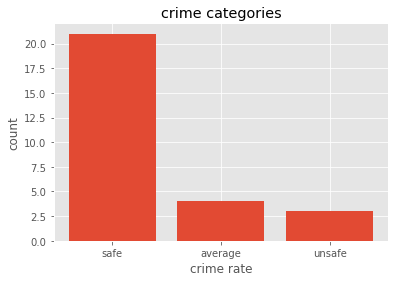

In [45]:
#plot the distribution of each bin.
pyplot.bar(crime_groups, SYD_suburbs_crimes['crime category'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("crime rate")
plt.pyplot.ylabel("count")
plt.pyplot.title("crime categories")

In [46]:
# one hot encoding - dataframe to show room price in each Suburb
SYD_crime_by_cat = pd.get_dummies(SYD_suburbs_crimes[['crime category']], prefix="", prefix_sep="")

# add Suburb column back to dataframe
SYD_crime_by_cat['Suburb'] = SYD_suburbs_crimes['Suburb'] 

SYD_crime_by_cat

,safe,average,unsafe,Suburb
0,1,0,0,Ashfield
1,1,0,0,Auburn
2,0,1,0,Bankstown
3,0,0,1,Blacktown
4,1,0,0,Burwood
5,1,0,0,Camden
6,0,1,0,Campbelltown
7,1,0,0,Canterbury
8,1,0,0,Fairfield
9,1,0,0,Holroyd


In [47]:
#merge the 2 tables to show crime rate and price groups in one
SYD_suburbs_cat = pd.merge(SYD_Airbnb_by_cat[['Suburb', 'low', 'medium','high']], SYD_crime_by_cat [['safe', 'average', 'unsafe', 'Suburb']], left_on='Suburb', right_on='Suburb', how = 'left')
SYD_suburbs_cat

,Suburb,low,medium,high,safe,average,unsafe
0,Ashfield,1,0,0,1,0,0
1,Auburn,1,0,0,1,0,0
2,Bankstown,1,0,0,0,1,0
3,Blacktown,1,0,0,0,0,1
4,Burwood,1,0,0,1,0,0
5,Camden,1,0,0,1,0,0
6,Campbelltown,0,1,0,0,1,0
7,Canterbury,1,0,0,1,0,0
8,Fairfield,1,0,0,1,0,0
9,Holroyd,0,1,0,1,0,0


In [82]:
#merge the 2 tables to show crime rate and price categories in one
SYD_suburbs_cat2 = pd.merge(SYD_suburbs_crimes[['Postcode','Suburb', 'latitude', 'longitude', 'crime category']], SYD_Airbnb[['Suburb', 'price category']], left_on='Suburb', right_on='Suburb', how = 'left')
print(SYD_suburbs_cat2.shape)
SYD_suburbs_cat2.head()

(28, 6)


,Postcode,Suburb,latitude,longitude,crime category,price category
0,2131,Ashfield,-33.88950,151.12522,safe,low
1,2144,Auburn,-33.84787,151.07174,safe,low
2,2200,Bankstown,-33.90007,151.05950,average,low
3,2148,Blacktown,-33.69214,150.88678,unsafe,low
4,2134,Burwood,-33.88060,151.10835,safe,low


**Cluster by Foursquare data - venues number and categories**

In [48]:
# one hot encoding - dataframe to show all venue categories in each suburb
Sydney_by_cat = pd.get_dummies(Sydney_venues[['Venue Category']], prefix="", prefix_sep="")

# add Suburb column back to dataframe
Sydney_by_cat['Suburb'] = Sydney_venues['Suburb'] 

# move Suburb column to the first column
fixed_columns = [Sydney_by_cat.columns[-1]] + list(Sydney_by_cat.columns[:-1])
Sydney_by_cat = Sydney_by_cat[fixed_columns]

Sydney_by_cat.head()

,Suburb,American Restaurant,Arepa Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bar,Beach,Beijing Restaurant,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Cha Chaan Teng,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Egyptian Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hookah Bar,Hot Dog Joint,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Liquor Store,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motel,Movie Theater,Noodle House,Office,Pakistani Restaurant,Park,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,South American Restaurant,Souvlaki Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trade School,Trail,Train Station,Turkish Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Ashfield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ashfield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ashfield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ashfield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ashfield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
#check the dataframe size
Sydney_by_cat.shape

(518, 139)

In [50]:
#Next, let's group rows by Suburb and by taking the mean of the frequency of occurrence of each category
Sydney_grouped = Sydney_by_cat.groupby('Suburb').mean().reset_index()
print(Sydney_grouped.shape)
Sydney_grouped

(25, 139)


,Suburb,American Restaurant,Arepa Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bar,Beach,Beijing Restaurant,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Cha Chaan Teng,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Egyptian Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hookah Bar,Hot Dog Joint,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Liquor Store,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motel,Movie Theater,Noodle House,Office,Pakistani Restaurant,Park,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,South American Restaurant,Souvlaki Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trade School,Trail,Train Station,Turkish Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Ashfield,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.027778,0.0,0.027778,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055556,0.000000,0.027778,0.000000,0.000000,0.055556,0.000000,0.000000,0.027778,0.000000,0.027778,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.055556,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.027778,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.027778,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.027778,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.083333,0.00,0.000000,0.000000,0.027778,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000
1,Auburn,0.000000,0.000000,0.0,0.071429,0.035714,0.071429,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.035714,0.0,0.000000,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.03

In [56]:
#append 3 suburbs that do not have any venues listed on Foursquare (Blacktown, Camden and c)
missing_suburbs = [pd.Series(['Blacktown', 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], index=Sydney_grouped.columns ) ,
                pd.Series(['Camden', 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], index=Sydney_grouped.columns ) ,
                pd.Series(['Penrith', 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], index=Sydney_grouped.columns ) ]
Sydney_grouped_all = Sydney_grouped.append(missing_suburbs)
Sydney_grouped_all

,Suburb,American Restaurant,Arepa Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bar,Beach,Beijing Restaurant,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Cha Chaan Teng,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Egyptian Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hookah Bar,Hot Dog Joint,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Liquor Store,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motel,Movie Theater,Noodle House,Office,Pakistani Restaurant,Park,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,South American Restaurant,Souvlaki Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trade School,Trail,Train Station,Turkish Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Ashfield,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.027778,0.0,0.027778,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055556,0.000000,0.027778,0.000000,0.000000,0.055556,0.000000,0.000000,0.027778,0.000000,0.027778,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.055556,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.027778,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.027778,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.027778,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.083333,0.00,0.000000,0.000000,0.027778,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000
1,Auburn,0.000000,0.000000,0.0,0.071429,0.035714,0.071429,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.035714,0.0,0.000000,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.03

In [79]:
#CHECK THE MOST COMMON VENUES IN EACH Suburb

#define function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#create the new dataframe and display the top 5 venues for each neighborhood
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Suburb_venues_sorted = pd.DataFrame(columns=columns)
Suburb_venues_sorted['Suburb'] = Sydney_grouped['Suburb']

for ind in np.arange(Sydney_grouped.shape[0]):
    Suburb_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Sydney_grouped.iloc[ind, :], num_top_venues)

Suburb_venues_sorted.head()

,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Ashfield,Platform,Dumpling Restaurant,Shanghai Restaurant,Japanese Restaurant,Supermarket
1,Auburn,Café,Hotel,Vietnamese Restaurant,Asian Restaurant,Australian Restaurant
2,Bankstown,Park,Business Service,Yoga Studio,Fish Market,Fish & Chips Shop
3,Burwood,Chinese Restaurant,Vietnamese Restaurant,Hookah Bar,Asian Restaurant,Szechuan Restaurant
4,Campbelltown,Mexican Restaurant,Hot Dog Joint,Café,Toy / Game Store,Clothing Store


In [80]:
#merge the 2 tables to show categories in each suburb sorted from most venues' numbers to the least
Syd_cat_sorted = pd.merge(Sydney_venues_sorted ['Venue'], Suburb_venues_sorted, left_on='Suburb', right_on='Suburb', how = 'inner')
Syd_cat_sorted.head()

,Suburb,Venue,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Sydney,93,Café,Seafood Restaurant,Australian Restaurant,Pub,Japanese Restaurant
1,Waverley,58,Café,Japanese Restaurant,Coffee Shop,Bakery,Pizza Place
2,Willoughby,47,Café,Food Court,Coffee Shop,Chinese Restaurant,Japanese Restaurant
3,Strathfield,44,Korean Restaurant,Café,Korean BBQ Restaurant,Thai Restaurant,Vietnamese Restaurant
4,Marrickville,43,Bar,Café,Vietnamese Restaurant,Turkish Restaurant,Pizza Place


In [60]:
#merge the 2 tables to show all categories for each suburb
SYD_all_criteria = pd.merge(SYD_suburbs_cat, 
                            Syd_cat_sorted[['Suburb', '1st Most Common Venue', '2nd Most Common Venue','3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue']], 
                            left_on='Suburb', right_on='Suburb', how = 'outer')
SYD_all_criteria.head()

,Suburb,low,medium,high,safe,average,unsafe,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Ashfield,1,0,0,1,0,0,Platform,Dumpling Restaurant,Shanghai Restaurant,Japanese Restaurant,Supermarket
1,Auburn,1,0,0,1,0,0,Café,Hotel,Vietnamese Restaurant,Asian Restaurant,Australian Restaurant
2,Bankstown,1,0,0,0,1,0,Park,Business Service,Yoga Studio,Fish Market,Fish & Chips Shop
3,Blacktown,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN
4,Burwood,1,0,0,1,0,0,Chinese Restaurant,Vietnamese Restaurant,Hookah Bar,Asian Restaurant,Szechuan Restaurant


In [70]:
#merge the 2 tables to show all categories for each suburb
SYD_all_venues = pd.merge(Sydney_venues, 
                          SYD_all_criteria[['Suburb', 'low', 'medium', 'high', 'safe', 'average', 'unsafe']], 
                            left_on='Suburb', right_on='Suburb', how = 'left')
SYD_all_venues.head()

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,low,medium,high,safe,average,unsafe
0,Ashfield,-33.8895,151.12522,Manmaruya,-33.889603,151.126183,Japanese Restaurant,1,0,0,1,0,0
1,Ashfield,-33.8895,151.12522,Choo Choo Train,-33.888275,151.124196,Chinese Restaurant,1,0,0,1,0,0
2,Ashfield,-33.8895,151.12522,New Shanghai Night 新夜上海,-33.888461,151.124393,Shanghai Restaurant,1,0,0,1,0,0
3,Ashfield,-33.8895,151.12522,New Shanghai 新上海,-33.888160,151.124500,Shanghai Restaurant,1,0,0,1,0,0
4,Ashfield,-33.8895,151.12522,Taste of Shanghai,-33.888279,151.123992,Dumpling Restaurant,1,0,0,1,0,0


In [72]:
# one hot encoding - dataframe to show all venue, price and safety categories in each Suburb
SYD_by_cat = pd.get_dummies(SYD_all_venues[['Venue Category', 'low', 'medium', 'high', 'safe', 'average', 'unsafe']], prefix="", prefix_sep="")

# add Neighbourhood column back to dataframe
SYD_by_cat['Suburb'] = SYD_all_venues['Suburb'] 

# move Neighbourhood column to the first column
fixed_columns = [SYD_by_cat.columns[-1]] + list(SYD_by_cat.columns[:-1])
SYD_by_cat = SYD_by_cat[fixed_columns]

SYD_by_cat.head()

,Suburb,low,medium,high,safe,average,unsafe,American Restaurant,Arepa Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bar,Beach,Beijing Restaurant,Board Shop,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Business Service,Butcher,Café,Candy Store,Cantonese Restaurant,Cha Chaan Teng,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Dog Run,Donut Shop,Dumpling Restaurant,Egyptian Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food Court,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Historic Site,Hookah Bar,Hot Dog Joint,Hotel,Hungarian Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean BBQ Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Liquor Store,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Motel,Movie Theater,Noodle House,Office,Pakistani Restaurant,Park,Pedestrian Plaza,Peking Duck Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,South American Restaurant,Souvlaki Shop,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trade School,Trail,Train Station,Turkish Restaurant,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Ashfield,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ashfield,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Ashfield,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ashfield,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ashfield,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
#Cluster Suburbs
#Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 5

Sydney_grouped_clustering = Sydney_grouped_all.drop(['Suburb'] , 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Sydney_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 1, 0, 4, 1, 1, 1, 4, 3, 1], dtype=int32)

In [92]:
#merge the 2 table to combine all data by suburb - price and crima categories, and top 5 venues
SYD_combined = pd.merge(SYD_suburbs_cat2, Syd_cat_sorted, left_on='Suburb', right_on='Suburb', how = 'left')
print(SYD_combined.shape)
SYD_combined.head()

(28, 12)


,Postcode,Suburb,latitude,longitude,crime category,price category,Venue,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2131,Ashfield,-33.88950,151.12522,safe,low,36.0,Platform,Dumpling Restaurant,Shanghai Restaurant,Japanese Restaurant,Supermarket
1,2144,Auburn,-33.84787,151.07174,safe,low,28.0,Café,Hotel,Vietnamese Restaurant,Asian Restaurant,Australian Restaurant
2,2200,Bankstown,-33.90007,151.05950,average,low,2.0,Park,Business Service,Yoga Studio,Fish Market,Fish & Chips Shop
3,2148,Blacktown,-33.69214,150.88678,unsafe,low,NaN,NaN,NaN,NaN,NaN,NaN
4,2134,Burwood,-33.88060,151.10835,safe,low,9.0,Chinese Restaurant,Vietnamese Restaurant,Hookah Bar,Asian Restaurant,Szechuan Restaurant


In [95]:
#create a new dataframe that includes the cluster as well
# add clustering labels
SYD_combined.insert(0, 'Cluster Labels', kmeans.labels_)
SYD_combined

,Cluster Labels,Postcode,Suburb,latitude,longitude,crime category,price category,Venue,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,4,2131,Ashfield,-33.88950,151.12522,safe,low,36.0,Platform,Dumpling Restaurant,Shanghai Restaurant,Japanese Restaurant,Supermarket
1,1,2144,Auburn,-33.84787,151.07174,safe,low,28.0,Café,Hotel,Vietnamese Restaurant,Asian Restaurant,Australian Restaurant
2,0,2200,Bankstown,-33.90007,151.05950,average,low,2.0,Park,Business Service,Yoga Studio,Fish Market,Fish & Chips Shop
3,4,2148,Blacktown,-33.69214,150.88678,unsafe,low,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2134,Burwood,-33.88060,151.10835,safe,low,9.0,Chinese Restaurant,Vietnamese Restaurant,Hookah Bar,Asian Restaurant,Szechuan Restaurant
5,1,2570,Camden,-34.00516,150.73021,safe,low,NaN,NaN,NaN,NaN,NaN,NaN
6,1,2560,Campbelltown,-34.07567,150.79171,average,medium,5.0,Mexican Restaurant,Hot Dog Joint,Café,Toy / Game Store,Clothing Store
7,4,2193,Canterbury,-33.92975,151.10013,safe,low,2.0,Asian Restaurant,Café,Yoga Studio,Farmers Market,Fountain
8,3,2165,Fairfield,-33.88481,150.93137,safe,low,15.0,Vietnamese Restaurant,Café,Steakhouse,Grocery Store,Chinese Restaurant
9,1,2142,Holroyd,-33.84959,150.98385,safe,medium,5.0,Supermarket,Library,Bowling Alley,Sporting Goods Shop,Fast Food Restaurant


In [104]:
#rearrange columns (https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns)
#reassign the dataframe with a list of the columns
cols3 = SYD_combined.columns.tolist()
#current columns order
cols3
#Rearrange cols they way you want
cols4 = ['Postcode',
         'Suburb',
         'latitude',
         'longitude',
         'Cluster Labels',
         'price category',
         'crime category',       
         'Venue',
         '1st Most Common Venue',
         '2nd Most Common Venue',
         '3rd Most Common Venue',
         '4th Most Common Venue',
         '5th Most Common Venue',
          ]
#new columns order
cols4
#reorder the dataframe like this and drop some columns (where 1 is the axis number (0 for rows and 1 for columns.)):
SYD_merged_clusters = SYD_combined[cols4]

#sort by Cluster labels
SYD_clusters = SYD_merged_clusters.sort_values(by = 'Cluster Labels', ascending=True)

print(SYD_clusters.shape)
SYD_clusters

(28, 13)


,Postcode,Suburb,latitude,longitude,Cluster Labels,price category,crime category,Venue,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,2200,Bankstown,-33.90007,151.05950,0,low,average,2.0,Park,Business Service,Yoga Studio,Fish Market,Fish & Chips Shop
13,2040,Leichhardt,-33.85367,151.17861,1,medium,safe,39.0,Café,Pub,Sushi Restaurant,Bar,Pizza Place
12,2217,Kogarah,-33.98462,151.11747,1,low,safe,5.0,Convenience Store,Liquor Store,Fish & Chips Shop,Café,Fast Food Restaurant
11,2220,Hurstville,-33.95277,151.08254,1,low,safe,27.0,Chinese Restaurant,Café,Japanese Restaurant,Italian Restaurant,Thai Restaurant
10,2077,Hornsby,-33.76990,151.08868,1,low,safe,1.0,Arts & Crafts Store,Yoga Studio,Falafel Restaurant,Fountain,Food Court
17,2088,Mosman,-33.82067,151.23555,1,high,safe,4.0,Playground,Sporting Goods Shop,Board Shop,Auto Workshop,Falafel Restaurant
24,2000,Sydney,-33.87369,151.19606,1,low,unsafe,93.0,Café,Seafood Restaurant,Australian Restaurant,Pub,Japanese Restaurant
9,2142,Holroyd,-33.84959,150.98385,1,medium,safe,5.0,Supermarket,Library,Bowling Alley,Sporting Goods Shop,Fast Food Restaurant
5,2570,Camden,-34.00516,150.73021,1,low,safe,NaN,NaN,NaN,NaN,NaN,NaN
4,2134,Burwood,-33.88060,151.10835,1,low,safe,9.0,Chinese Restaurant,Vietnamese Restaurant,Hookah Bar,Asian Restaurant,Szechuan Restaurant


In [105]:
#group rows by cluster laberls to see # of suburbs in each cluster
SYD_clustered = SYD_merged_clusters.groupby('Cluster Labels').count().reset_index()
SYD_clustered

,Cluster Labels,Postcode,Suburb,latitude,longitude,price category,crime category,Venue,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,11,11,11,11,11,11,10,10,10,10,10,10
2,2,1,1,1,1,1,1,1,1,1,1,1,1
3,3,1,1,1,1,1,1,1,1,1,1,1,1
4,4,14,14,14,14,14,14,12,12,12,12,12,12


In [99]:
#visualize the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SYD_merged_clusters['latitude'], SYD_merged_clusters['longitude'], SYD_merged_clusters['Suburb'], SYD_merged_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [122]:
# generate choropleth map using the average price of accomodation in each suburb
import json # library to handle JSON files

#Download the data from https://data.gov.au with NSW GeoJSON file
!wget --quiet https://data.gov.au/geoserver/nsw-suburb-locality-boundaries-psma-administrative-boundaries/wfs?request=GetFeature&typeName=ckan_91e70237_d9d1_4719_a82f_e71b811154c6&outputFormat=json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [ ]:
SYD_geo = "https://data.gov.au/geoserver/nsw-suburb-locality-boundaries-psma-administrative-boundaries/wfs?request=GetFeature&typeName=ckan_91e70237_d9d1_4719_a82f_e71b811154c6&outputFormat=json" # geojson file

map_clusters.choropleth(
    geo_data=SYD_geo,
    data=SYD_Airbnb_prices,
    columns=['Suburb', 'price'],
    key_on='feature.properties.nsw_loca_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Accomodation prices in Sydney'
)

# display map
map_clusters